In [1]:
# urllib = url인코딩 할때 필요한 라이브러리
import urllib.parse

import pandas as pd

MARKET_CODE_DICT = {

    'kospi': 'stockMkt',

    'kosdaq': 'kosdaqMkt',

    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

def zeroFill(columnValue):

    columnValue = str(columnValue)

    outValue = columnValue.zfill(6)

    return outValue

def get_stock_codes(market=None, delisted=False):

    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가

        params['marketType'] = MARKET_CODE_DICT[market]

        print(market.lower()+" market key is exist")

    else:

        print("invalid market")

    # make url  key=value & key = value

    params_string = urllib.parse.urlencode(params)

    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url)[0]

    df["종목코드"] = df.종목코드.apply(zeroFill)
#     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
 
    return df

stocks = get_stock_codes('kospi')

stocks.head(5)

stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)

# 종목코드 불러오기
wantCode = stocks[stocks['회사명'] == '삼성전자'].iloc[0]
finalCode = wantCode[1]
finalCode

kospi market key is exist
DRB동일
004840


'005930'

In [5]:
stockInput = input()
targetCode = '종목코드'
temp = ''
# 종목코드 불러오기
for i in range(0,len(stocks)):
    stock_code = stocks.iloc[i][targetCode]
    stock_name = stocks.iloc[i]['회사명']
    if stock_name == stockInput:
        temp = stock_name
        print(stock_code)
        break
    if(i == len(stocks)-1)and(temp == ""): 
        print('입력오류')

 삼성전자


005930


In [7]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from matplotlib import font_manager, rc
import platform

print(platform.system())

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    pass

Windows


In [8]:
end = date.today()
start = date.today() - timedelta(50) # datetime.datetime(2021,4,1) 

STOCK = web.DataReader(stock_code, start, end)
STOCK

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-13,83000,84500,82800,84000,15238206,0.009615
2021-04-14,84000,84300,83400,84000,13794652,0.000000
2021-04-15,83700,84500,83400,84100,16377412,0.001190
2021-04-16,84700,84700,83600,83900,15429522,-0.002378
2021-04-19,83800,84000,83300,83300,15287311,-0.007151
2021-04-20,83300,84000,83100,83900,15521965,0.007203
2021-04-21,83300,83500,82500,82600,21636079,-0.015495
2021-04-22,82900,83000,82400,82400,13934746,-0.002421
2021-04-23,81900,82900,81600,82800,17805080,0.004854


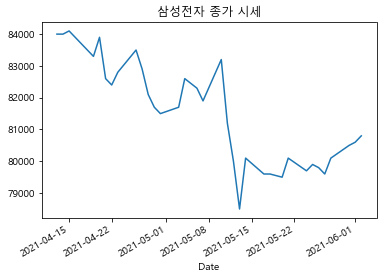

In [10]:
STOCK['Close'].plot()
# print(plt.style.available)
# plt.style.use(['fivethirtyeight'])
plt.title(stock_name+" 종가 시세")
plt.show()

In [11]:
STOCK.tail()
STOCK["MA_5"]=STOCK["Close"].rolling(window=5).mean() # min_periods=1
STOCK["MA_20"]=STOCK["Close"].rolling(window=20).mean()
STOCK["diff"]=STOCK["MA_5"]-STOCK["MA_20"]
# 끝 5개
STOCK.tail(5)

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2021-05-27,80000,80000,79100,79600,23198510,-0.002506,79820.0,80730.0,-910.0
2021-05-28,79800,80400,79400,80100,12360199,0.006281,79820.0,80630.0,-810.0
2021-05-31,80300,80600,79600,80500,13321324,0.004994,79980.0,80570.0,-590.0
2021-06-01,80500,81300,80100,80600,14058401,0.001242,80120.0,80525.0,-405.0
2021-06-02,80400,81400,80300,80800,16319885,0.002481,80320.0,80480.0,-160.0


In [12]:
# 처음 5개
STOCK.head(5)

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2021-04-13,83000,84500,82800,84000,15238206,0.009615,NaN,NaN,NaN
2021-04-14,84000,84300,83400,84000,13794652,0.000000,NaN,NaN,NaN
2021-04-15,83700,84500,83400,84100,16377412,0.001190,NaN,NaN,NaN
2021-04-16,84700,84700,83600,83900,15429522,-0.002378,NaN,NaN,NaN
2021-04-19,83800,84000,83300,83300,15287311,-0.007151,83860.0,NaN,NaN


C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


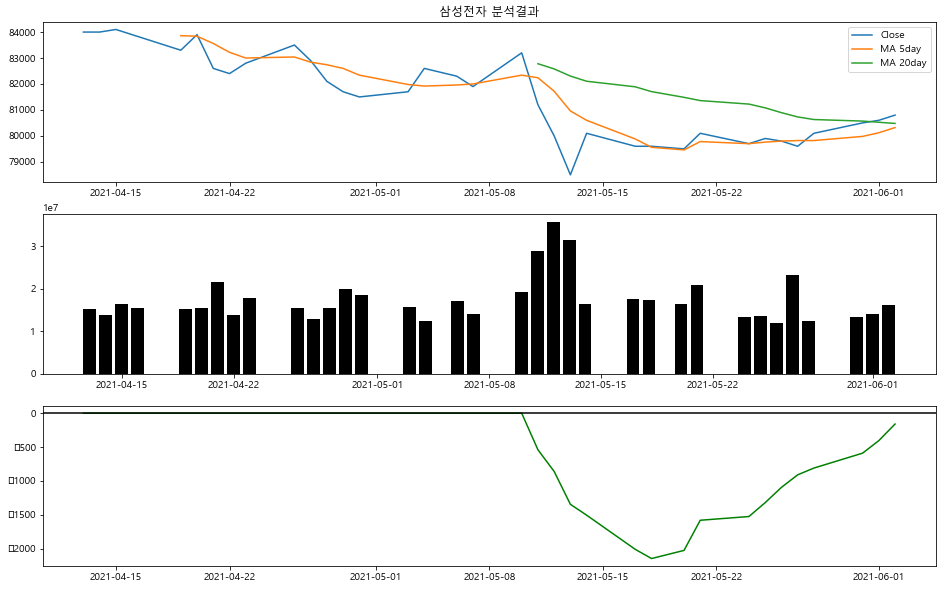

In [13]:

plt.figure(figsize = (16,10))

# price(가격), close(종가), MA5day(5일이동평균선), MA20day(20일이동평균선)
plt.subplot(311)
plt.plot(STOCK.index, STOCK['Close'], label = 'Close')
plt.plot(STOCK.index, STOCK['MA_5'], label='MA 5day')
plt.plot(STOCK.index, STOCK['MA_20'], label='MA 20day')
plt.title(stock_name+" 분석결과")

# best = 적당한위치(다른 위치지정도 가능)
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(STOCK.index, STOCK['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(STOCK.index, STOCK['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k') # https://financedata.github.io/posts/matplotlib_hline_and_vline.html